In [28]:
import os
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from run_predictions import *
from eval_detector import *

In [10]:
gts_path = '../data/hw02_annotations'
data_path = '../data/RedLights2011_Medium'
preds_path = '../data/hw02_preds'

# Parameters
radius_circ_kernel = 4 # radius of the circular step kernel
sigma_gaussian_kernel = 1 # radius of the gaussian smooth kernel
thr = 0.18 # threshold for detection
area_min = 12 # mininum area of a patch to be considered as traffic light
area_max = 1500 # maximum area of a patch to be considered as traffic light
ratio_max = 0.9 # maximum aspect ratio of a patch to be considered as traffic light

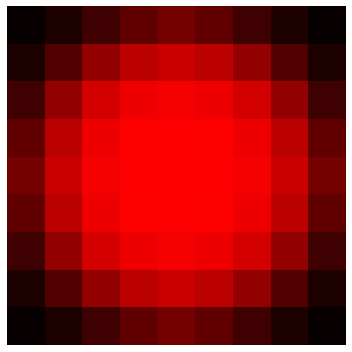

In [41]:
kernel = compute_convolution(circ_2d(radius_circ_kernel), gaus_2d(sigma_gaussian_kernel))

plt.figure(figsize=(5, 5), tight_layout=True)
plt.imshow(np.dstack((kernel/kernel.max(), kernel*0, kernel*0)))
plt.gca().axis('off')
plt.savefig(os.path.join(gts_path, 'Kernel.pdf'), pad_inches=0, bbox_inches='tight')
plt.show()

In [12]:
with open(os.path.join(preds_path,'preds_train.json'),'r') as f:
    preds_train = json.load(f)
with open(os.path.join(gts_path, 'annotations_train.json'),'r') as f:
    gts_train = json.load(f)
with open(os.path.join(preds_path,'preds_test.json'),'r') as f:
    preds_test = json.load(f)
with open(os.path.join(gts_path, 'annotations_test.json'),'r') as f:
    gts_test = json.load(f)
preds = {**preds_train, **preds_test}
gts = {**gts_train, **gts_test}

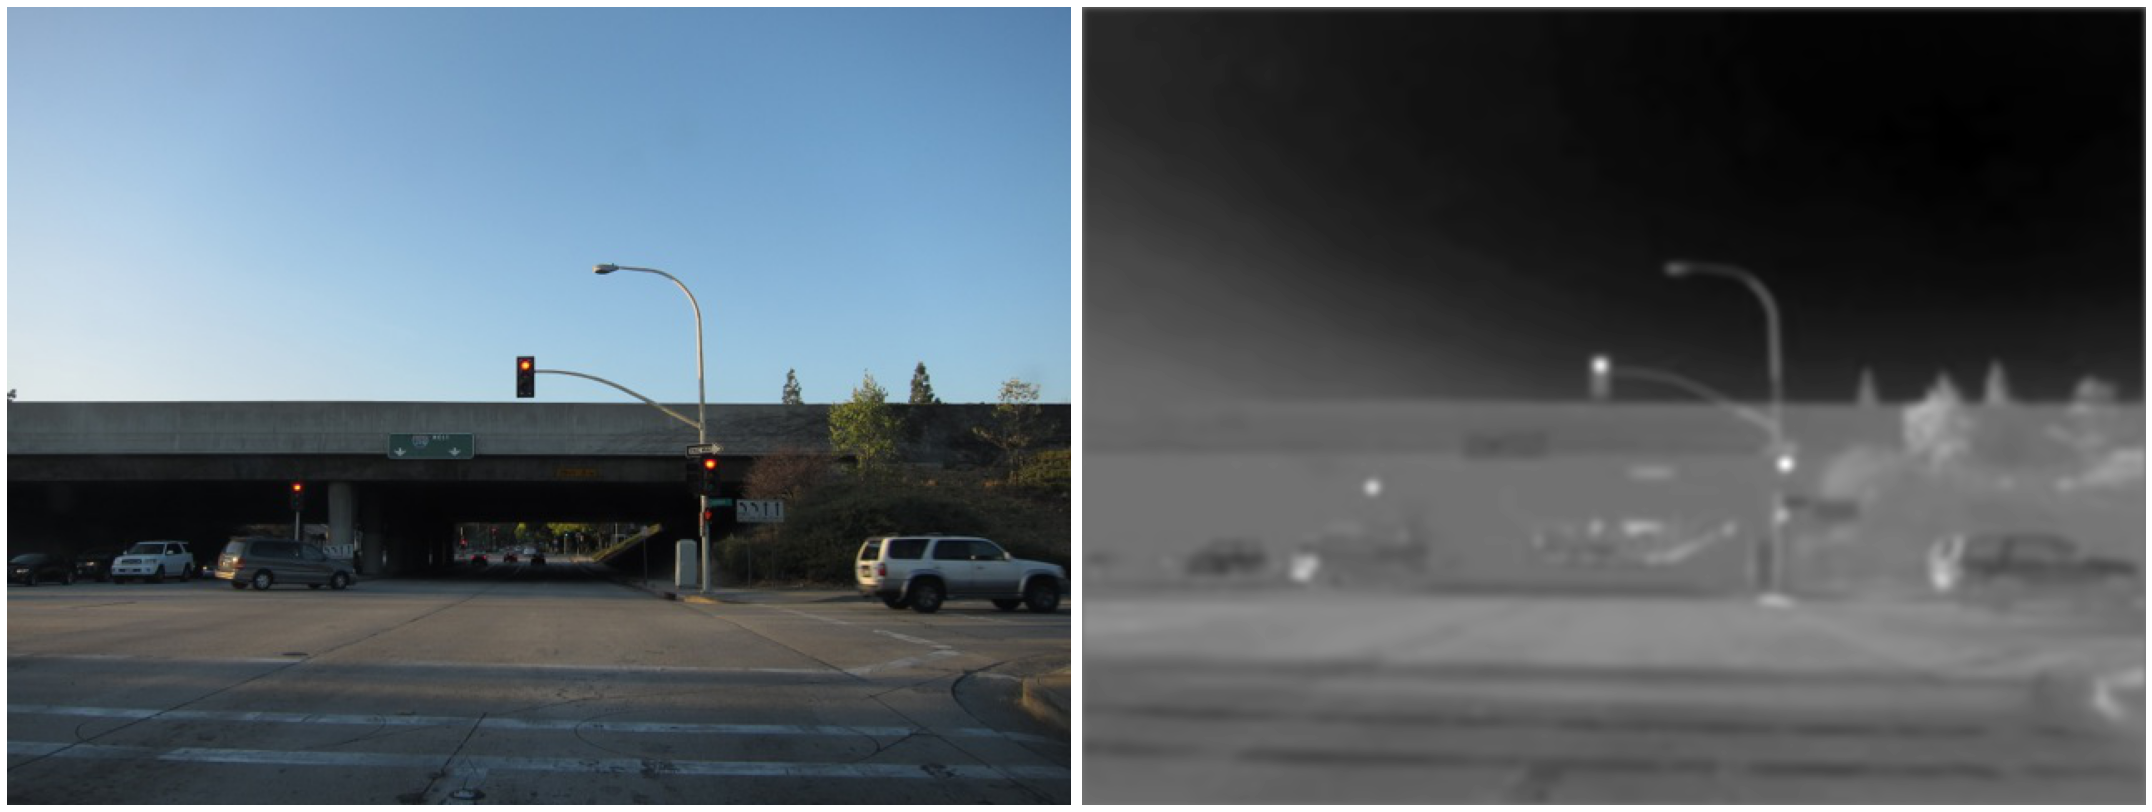

In [42]:
file_name = 'RL-287.jpg'
file_path = os.path.join(data_path, file_name)

I = Image.open(file_path)
I = np.asarray(I)

I_float = I.astype(float)/255
I_single = I_float[:, :, 0]-I_float[:, :, 2]
I_filt = compute_convolution(compute_convolution(I_single, circ_2d(radius_circ_kernel)), gaus_2d(sigma_gaussian_kernel))
plt.figure(figsize=(30, 15), tight_layout=True)
plt.subplot(121)
plt.imshow(I)
plt.gca().axis('off')
plt.subplot(122)
plt.imshow(I_filt, cmap='gray')
plt.gca().axis('off')
plt.savefig(os.path.join(gts_path, 'Heatmap.pdf'), pad_inches=0, bbox_inches='tight')
plt.show()

In [61]:
file_names = ['RL-271.jpg', 'RL-048.jpg', 'RL-245.jpg', 'RL-307.jpg']
out_names = ['Good_1.pdf', 'Good_2.pdf', 'Bad_1.pdf', 'Bad_2.pdf']

for file_name, out_name in zip(file_names, out_names):
    file_path = os.path.join(data_path, file_name)
    I = Image.open(file_path)
    I = np.asarray(I)

    plt.figure(figsize=(20, 15), tight_layout=True)
    plt.imshow(I)
    for box in preds[file_name]:
        plt.gca().add_patch(patches.Rectangle((box[1], box[0]), box[3]-box[1], box[2]-box[0], linewidth=1.5, edgecolor='b', facecolor='none'))
        plt.text(box[3], box[2], f'{box[-1]:.3f}', color='r', fontweight='bold', fontsize=12)
    for box in gts[file_name]:
        plt.gca().add_patch(patches.Rectangle((box[1], box[0]), box[3]-box[1], box[2]-box[0], linewidth=1.5, edgecolor='g', facecolor='none'))
    plt.gca().axis('off')
    plt.savefig(os.path.join(gts_path, out_name), pad_inches=0, bbox_inches='tight')
    plt.close()
